# Team members
- Bishal Sainju
- Supratik Chanda
- Victor Lee

# Introduction
We have tried to build a KNN model to predict whether or not a person has a heart disease. 
We expect to create the model that would generalize well in the real world patients. 

# Dataset
The dataset that we used is Cleveland Heart Disease Dataset.<br>
It contains 14 different attributes, 1 being the result whether or not the patient had the heart disease. <br>
It has 303 entries with 13 attributes describing person's health related parameters, so that we can predict heart disease from these attributes. <br>
First, we cleaned the data, deleted any record having values like '?'. <br>
Then, we checked for outliers and removed them. <br>
Before feeding our data to the training model, we normalized it using the standard scaler. <br> 

# Analysis Technique

1. Data Cleaning: First, we dropped any abnormal values(like NaN, ?) and then plotted the boxplot to figure out if there was any outliers in the data. There was some harsh outliers in these attributes: ['trestbps', 'chol', 'thalach'] So, we removed those outliers, by removing all the data that was not in the Interquartile range in those attributes. <br>
<img src="img/hd/outlier.png"><br>
<img src="img/hd/outlier_rem.png"><br>
2. Data Analysis: Then, we plotted the bar graph to get some idea of the various attributes. <br>
<img src="img/hd/1.png"><br>
We see that chest pain type 4(asymptotic chest pain type) is much more indicative of having heart disease than other type of chest pains (typical angina, atypical angina, non-anginal pain) <br>
<img src="img/hd/2.png"><br>
'Fbs'(fasting blood sugar > 120 mg/dl) does not seem to clearify if a person will have heart disease or not.<br>
<img src="img/hd/3.png"><br>
We see that more records having restecg('resting electrocardiographic results') value 2.0(showing probable or definite left ventricular hypertrophy by Estes' criteria) will have heart disease, and more records having restecg value 0.0('normal') will not have heart disease. But these values are not quite clear cut although, there is some information in this data.<br>
<img src="img/hd/4.png"><br>
It seems like ca value 0(number of major vessels) signifies no heart disease.<br>
<img src="img/hd/5.png"><br>
It seems like thal value 7(reversable defect ) indicates heart disease, and thal value 3('normal') means no heart disease in most of the cases.<br>
<img src="img/hd/6.png"><br>
It seems like 'male' tends to have more heart disease than female<br>
Conclusion:<br>
By, this analysis we can see that, cp_4.0 must be important over other cp values. <br>
Similarly, we can see that, 'fbs' attribute is not much important in determining if a person has a heart disease or not. <br>
Similarly, 'restecg_0' and 'restecg_2.0' are important predictors whereas restecg_1.0 is not. <br>
Similarly, 'ca_0' is a much more important characteristics than other values. <br>
Similarly, thal_3.0 and thal_7.0 are important characteristics.<br>
3. Since, we have many categorical attributes, we encoded them using get_dummies. <br>
We applied get_dummies on these categorical attributes: ['cp', 'restecg', 'slope', 'ca', 'thal' ]
4. Next, we wanted to know which attributes were the most important ones. So, we first standardized the data and used  correlation matrix to know the correlation between various attribute. 
<img src="img/hd/correlation.png"><br>
Next, we just wanted to see the correlation of various attribute with 'num' which is the class for heart disease presence/absence. We looked at the correlation of various attributes with 'num', to see how various attributes correlates to predicting if a person has a heart disease or not.
So, we observed that:
<img src="img/hd/correlation1.png"><br>
We can see that attributes like ['thal_3.0', 'cp_4.0', 'thal_7.0', 'ca_0.0', 'oldpeak', 'thalach'] are more important because they have higher correlation with the 'num'. <br>
So, we used SelectKBest using f_regression to get the value of importance of each attributes. We then arranged the important features in order of important ones first, using SelectKBest function from sklearn feature selection. We used f_regression for getting importance of attribute value to figure out important features and ordered them in the order of their importance. Following are the attributes arranged in the order of their importance:<br>
['thal_3.0', 'cp_4.0', 'thal_7.0', 'ca_0.0', 'oldpeak', 'thalach', 'exang', 'slope_1.0', 'slope_2.0', 'sex', 'cp_3.0', 'ca_2.0', 'cp_2.0', 'ca_1.0', 'age', 'ca_3.0', 'restecg_0.0', 'restecg_2.0', 'trestbps', 'thal_6.0', 'chol', 'cp_1.0', 'slope_3.0', 'restecg_1.0', 'fbs']<br>
We got what was expected from the correlation matrix and our prior analysis. We see that cp_4, thal_3, thal_7 and ca_0 gets more priority as we had analyzed. Similarly, we see that attribute fbs is of no importance in determining if a person has a heart disease or not as we had previously implied, <br>
4. We then built our custom KNN model and custom Cross Validation Method. <br>
5. We then used for loop to determine the best parameter set that produced the best f1-score. We looped through values of no. of features to choose from 5 to 21 attributes to choose. After the get_dummies we had 25 different columns. We needed to choose the best parameter. So after many testing, we figured out our optimal no of feature selection should be between those values. For the feature selection we used SelectKBest method from sklearn.feature_selection, and used f_regression for scoring importance of features. 
6. Similarly, after several tests we found out that the optimal nearest neighbor val should be between [5, 15], so we looped through those values to determine the best parameter. 
5. Later, we used GridSearchCV, and Pipeline to use PCA, feature selection, and KNNclassifier(built-in) in pipeline


# Machine Learning Methods: 

#### Data Preprocessing:
We removed outliers, analyzed data, and then we standardized the data for further processing. 

#### Feature Extraction: 
The first part of the project is to extract the right features. For this we need to analyze the features. For this, we created the correlation matrix and observed the correlation of various attributes with the 'num' variable which is the target variable. We also used the SelectKBest method from sklearn.feature_selection using f_regression and f_classif, and mutual_info_classif, mutual_info_regression, and RFE(Recursive Feature elimination), to figure out which gives us the best result and after many hits and trials, we figured out f_regression was pretty simple and also gave best results. <br>
We used our own custom KNN model, and also the built in KNN model. <br>
For built in approach we placed feature extraction method in the pipeline before training KNN.<br>
We also tried PCA, but selecting k best features was much more better than using PCA. <br>
For custom model, we did not use grid search so we made for loop. <br>
For built in model, we used grid search. <br>
We found out that selecting between 15 - 20 features produced the best results. <br>
We got N_components = 19 as the optimal values for no of features to select <br>
They were: <br>
['thal_3.0', 'cp_4.0', 'thal_7.0', 'ca_0.0', 'oldpeak', 'thalach', 'exang', 'slope_1.0', 'slope_2.0', 'sex', 'cp_3.0', 'ca_2.0', 'cp_2.0', 'ca_1.0', 'age', 'ca_3.0', 'restecg_0.0', 'restecg_2.0', 'trestbps']

#### Model Creation:
We used both custom and built in model. 
For custom KNN model, we used KNearestNeighbor fucntion to get the nearest neighbor and based on that made our classifier. We also build our own Cross Validation method. We looped through various values of k(neares neighbor), and found out that optimal values were almost always between 5 to 15, so later we only looped through those values for k. For our custom model, we used uniform weights, we didn't implement distance weights, because from build in knn's grid search we had found out that the best params were when uniform weight was used.<br>
<br>
For the built in KNN model, we used built in KNN model. We used pipeline to also go through feature extraction stage. 
For feature extraction, we either used SelectKBest using [f_regression, f_classif, mutual_info_classif, mutual_info_regression] as the score metrics, or PCA. We used N_COMPONENTS value to go from 15 to 21. <br>
For KNN model, the parameter that we searched through were:<br>
N_NEIGHBOR: range(5, 15)<br>
DISTANCE: ['Euclidean']<br>
WEIGHTS: ['uniform', 'distance']<br>
ALG = ['auto']<br>
For feature selection:<br>
N_COMPONENT: range(15, 21)<br>
score_func: [f_regression, f_classif, mutual_info_classif, mutual_info_regression]


# Results
1. From the custom KNN model that we built, we obtained a maximum f1-score of 86.32, when we select 19 best features and 6 nearest neighbors as a parameter to our KNN model. <br>
The 19 best features that it selected were: <br>
N = 19: ['thal_3.0', 'cp_4.0', 'thal_7.0', 'ca_0.0', 'oldpeak', 'thalach', 'exang', 'slope_1.0', 'slope_2.0', 'sex', 'cp_3.0', 'ca_2.0', 'cp_2.0', 'ca_1.0', 'age', 'ca_3.0', 'restecg_0.0', 'restecg_2.0', 'trestbps']<br>
The scores are as follows: <br>
accuracy: 0.883, f1-score: 0.8632, precision: 0.872, recall: 0.8568<br>
The classification report, confusion matrix for one fold of the 5 folds for the best parameter (N=19, K=6) is as follows:
<img src="img/hd/cm1.png"><br>

2. However, we wanted to implement the pipeline and grid search library to do our task much efficiently. So we run our algorithm and searched for best parameter using gridsearchCV, and found out that the best parameters were the following: <br>
{'classify__algorithm': 'auto', 'classify__n_neighbors': 9, 'classify__weights': 'uniform', 'reduce_dim': SelectKBest(k=19, score_func=<function f_regression at 0x1a15a0f048>), 'reduce_dim__k': 19, 'reduce_dim__score_func': <function f_regression at 0x1a15a0f048>}
0.8585144483325244
<br>
The best estimate of the f1-score, we obtained was 0.8585<br>
It seems like built in model also selected almost the same model as our custom model. It also selected 19 features, however it selected 9 nearest neighbors. <br>
We then wanted to see it's confusion matrix and classification report, so we build a model using this best parameter, and fed it in cross_validation_score function. We found a f1-score of 0.8517, which is almost similar to the one found from gridSearchCV. We couldn't figure out why the f1-score varied although little between 2 cases, although all the parameters were same and we used the built in KNN. This is something we can look into for further analysis.<br>
The Confusion matrix, classification report for one fold of the 5 fold cross validation is as follows:
<img src="img/hd/cm2.png"><br>

This shows that our custom knn had best f1-score than the built in, it might be because of the difference in the implementaion of cross-validation score and knn classifier. <br>
The built-in cross validation uses stratifying parameter, whereas we have not implemented that.<br>

# Conclusion
Although f1-score varies, but we can confindently say that, those varies between 84 - 87%, which is quite reasonable. 
So using loop search, and grid search we were able to come up with pretty efficient model. <br>
However, there are still rooms for improvement which could be:
1. We could use more dataset to help us increase the f1-score. 
2. We could get more important attributes. 
3. We can get the help from the domain experts to get the idea of various attributes and work accordingly. 
4. We could use other efficient feature selection methods. 
5. KNN is a pretty naive classifier, we could check to see if other models will perform better for this dataset. 
6. More feature engineering required for better predictions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


hd = pd.read_csv('cleveland.csv')
print(hd.shape)
hd.dropna(inplace=True)
hd = hd[hd.ca != '?']
hd = hd[hd.thal != '?']
print(hd.shape)
hd.boxplot()
plt.xticks(rotation = 90)
plt.savefig('img/hd/outlier.png')
plt.show()


(303, 14)
(297, 14)


<Figure size 640x480 with 1 Axes>

There are some harsh outliers in trestbps, chol and thalach, so we removed them. 

(282, 14)


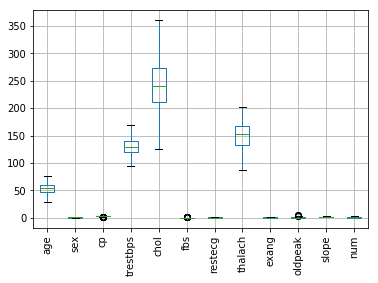

In [2]:
def remove_outliers(hd, cols):
    for col in cols:
        Q3 = hd[col].quantile(.75)
        Q1 = hd[col].quantile(.25)
        IQR = Q3 - Q1
        hd = hd[~((hd[col] < Q1 - 1.5 * IQR) | (hd[col] > Q3 + 1.5 * IQR))]
    return hd

hd = remove_outliers(hd, ['trestbps', 'chol', 'thalach'])
print(hd.shape)
hd.boxplot()
plt.xticks(rotation = 90)
plt.savefig('img/hd/outlier_rem.png')
plt.show()

In [3]:
hd.groupby('num')['num'].count()

num
0    154
1     52
2     32
3     32
4     12
Name: num, dtype: int64

Since 1, 2, 3 all signifies that heart disease is present, we convert this to binary attribute. That has 0 value are those with no heart disease, and rest are those with heart disease. 

In [4]:
#num: 1, 2, 3 = 1
hd['num'][hd['num'] != 0] = 1
# hd['num']
hd.groupby('num')['num'].count()

num
0    154
1    128
Name: num, dtype: int64

Now, let's analyse some categorical attributes. 

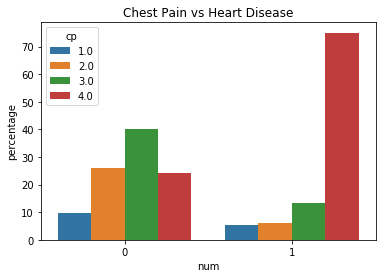

In [5]:
temp = (hd.groupby(['num']))['cp'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "cp", data = temp)\
.set_title("Chest Pain vs Heart Disease")
plt.savefig('img/hd/1.png')

We see that chest pain type 4 is much more indicative of having heart disease. 

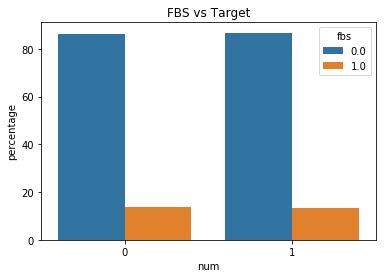

In [6]:
temp = (hd.groupby(['num']))['fbs'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "fbs", data = temp).set_title("FBS vs Target")
plt.savefig('img/hd/2.png')

'Fbs' does not seem to clearify if a person will have heart disease or not. 

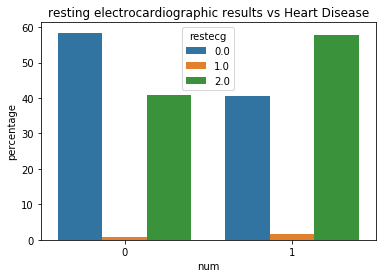

In [7]:
temp = (hd.groupby(['num']))['restecg'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "restecg", data = temp)\
.set_title("resting electrocardiographic results vs Heart Disease")
plt.savefig('img/hd/3.png')

We see that more records having restecg value 2.0 will have heart disease, and more records having restecg value 0.0 will not have heart disease. But these values are not quite clear cut although, there is some information in this data. 

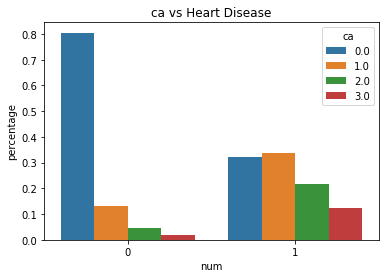

In [77]:
temp = (hd.groupby(['num']))['ca'].value_counts(normalize=True)\
.reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "ca", data = temp)\
.set_title("ca vs Heart Disease")
plt.savefig('img/hd/4.png')

It seems like ca value 0 signifies no heart disease. 

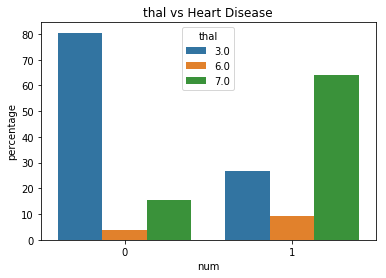

In [78]:
temp = (hd.groupby(['num']))['thal'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "thal", data = temp)\
.set_title("thal vs Heart Disease")
plt.savefig('img/hd/5.png')

It seems like thal value 7 indicates heart disease, and thal value 3 means no heart disease in most of the cases. 

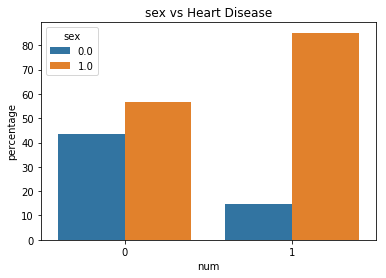

In [79]:
temp = (hd.groupby(['num']))['sex'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "num", y = "percentage", hue = "sex", data = temp)\
.set_title("sex vs Heart Disease")
plt.savefig('img/hd/6.png')

It seems like 'male' tends to have more heart disease. 

Now, we discretized(encoded) all the categorical attributes

In [80]:
#discretize the data (get_dummies)
hd = pd.get_dummies(hd, columns=['cp', 'restecg', 'slope', 'ca', 'thal' ], drop_first=False)
hd.head()

age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  num  cp_1.0  \
0  63.0  1.0     145.0  233.0  1.0    150.0    0.0      2.3    0       1   
1  67.0  1.0     160.0  286.0  0.0    108.0    1.0      1.5    1       0   
2  67.0  1.0     120.0  229.0  0.0    129.0    1.0      2.6    1       0   
3  37.0  1.0     130.0  250.0  0.0    187.0    0.0      3.5    0       0   
4  41.0  0.0     130.0  204.0  0.0    172.0    0.0      1.4    0       0   

     ...     slope_1.0  slope_2.0  slope_3.0  ca_0.0  ca_1.0  ca_2.0  ca_3.0  \
0    ...             0          0          1       1       0       0       0   
1    ...             0          1          0       0       0       0       1   
2    ...             0          1          0       0       0       1       0   
3    ...             0          0          1       1       0       0       0   
4    ...             1          0          0       1       0       0       0   

   thal_3.0  thal_6.0  thal_7.0  
0         0         1         0  
1         1         0         0  
2         0         0         1  
3         1         0         0  
4         1         0         0  

[5 rows x 26 columns]

Then we standardized the data. 

In [81]:
#standardize the data
from sklearn import preprocessing
col_to_norm = hd.columns.tolist()
col_to_norm.remove('num')
hd[col_to_norm] = preprocessing.StandardScaler().fit_transform(hd[col_to_norm])
hd.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


age       sex  trestbps      chol       fbs   thalach     exang  \
0  0.969368  0.662401  0.956135 -0.226835  2.533980  0.012802 -0.684653   
1  1.410275  0.662401  1.916813  0.947896 -0.394636 -1.836246  1.460593   
2  1.410275  0.662401 -0.644994 -0.315494 -0.394636 -0.911722  1.460593   
3 -1.896523  0.662401 -0.004542  0.149966 -0.394636  1.641724 -0.684653   
4 -1.455616 -1.509659 -0.004542 -0.869612 -0.394636  0.981350 -0.684653   

    oldpeak  num    cp_1.0    ...     slope_1.0  slope_2.0  slope_3.0  \
0  1.123914    0  3.437758    ...     -0.958315  -0.911685   3.720498   
1  0.420181    1 -0.290887    ...     -0.958315   1.096871  -0.268781   
2  1.387814    1 -0.290887    ...     -0.958315   1.096871  -0.268781   
3  2.179514    0 -0.290887    ...     -0.958315  -0.911685   3.720498   
4  0.332214    0 -0.290887    ...      1.043498  -0.911685  -0.268781   

     ca_0.0   ca_1.0    ca_2.0    ca_3.0  thal_3.0  thal_6.0  thal_7.0  
0  0.842075 -0.53635 -0.376431 -0.268781 -1.128802  3.829708 -0.776062  
1 -1.187542 -0.53635 -0.376431  3.720498  0.885895 -0.261116 -0.776062  
2 -1.187542 -0.53635  2.656528 -0.268781 -1.128802 -0.261116  1.288556  
3  0.842075 -0.53635 -0.376431 -0.268781  0.885895 -0.261116 -0.776062  
4  0.842075 -0.53635 -0.376431 -0.268781  0.885895 -0.261116 -0.776062  

[5 rows x 26 columns]

We looked at the correlation of various attributes with 'num', to see how various attributes correlates to predicting if a person has a heart disease or not. 

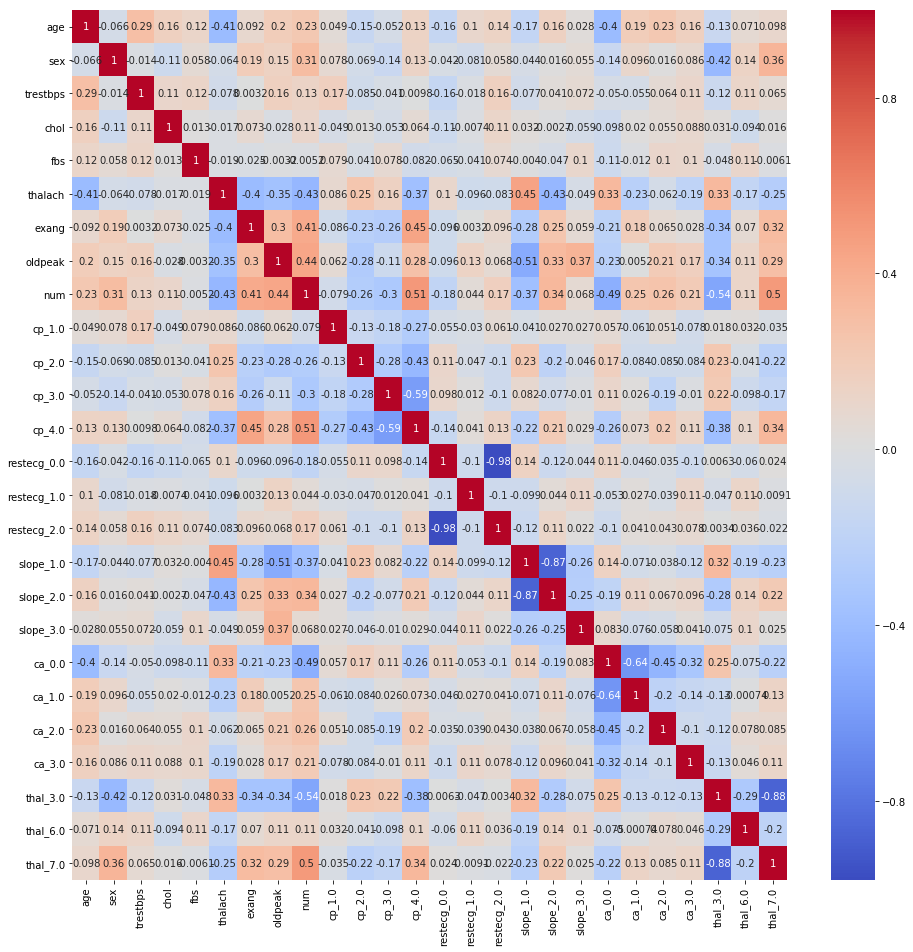

In [82]:
plt.figure(figsize=(16,16))
sns.heatmap(hd.corr(),annot=True,cmap='coolwarm')
plt.savefig('img/hd/correlation.png')
plt.show()

In [83]:
print(hd.corr()['num'])

age            0.230561
sex            0.309960
trestbps       0.131340
chol           0.105463
fbs           -0.005178
thalach       -0.433597
exang          0.414825
oldpeak        0.438209
num            1.000000
cp_1.0        -0.079296
cp_2.0        -0.261296
cp_3.0        -0.299103
cp_4.0         0.508388
restecg_0.0   -0.177411
restecg_1.0    0.044314
restecg_2.0    0.168382
slope_1.0     -0.374651
slope_2.0      0.341924
slope_3.0      0.067508
ca_0.0        -0.489967
ca_1.0         0.246310
ca_2.0         0.261680
ca_3.0         0.209577
thal_3.0      -0.541220
thal_6.0       0.111589
thal_7.0       0.498312
Name: num, dtype: float64


We then arranged the important features in order of important ones first, using SelectKBest functino from sklearn feature selection. We used f_regression for getting importance of attribute value. 


In [39]:
#Which features are the most important (arrange them in descending order)
from sklearn.feature_selection import SelectKBest, f_regression

X = hd[col_to_norm].values.astype(np.float)
y = hd['num'].values.astype(np.float)
k_best = SelectKBest(f_regression, k=len(col_to_norm)).fit(X, y)
score = np.array(k_best.scores_)
rank = score.argsort()[-len(col_to_norm):][::-1]
features = []
for i in rank:
    features.append(col_to_norm[i])
print(features)

['thal_3.0', 'cp_4.0', 'thal_7.0', 'ca_0.0', 'oldpeak', 'thalach', 'exang', 'slope_1.0', 'slope_2.0', 'sex', 'cp_3.0', 'ca_2.0', 'cp_2.0', 'ca_1.0', 'age', 'ca_3.0', 'restecg_0.0', 'restecg_2.0', 'trestbps', 'thal_6.0', 'chol', 'cp_1.0', 'slope_3.0', 'restecg_1.0', 'fbs']


We then built our custom KNN model and custom Cross Validation Method. 

In [40]:
#building custom model
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,\
                classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors

def classification_report_cm(y_true, y_pred):
    print (classification_report(y_true, y_pred))
    print (confusion_matrix(y_true, y_pred))

def accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def precision(y_true, y_pred):
    return precision_score(y_true, y_pred)

def recall(y_true, y_pred):
    return recall_score(y_true, y_pred)

def f1(y_true, y_pred):
    return f1_score(y_true, y_pred)

def knn(X_train, y_train, X_test, k):
    neigh = NearestNeighbors(n_neighbors=k).fit(X_train, y_train)
    y_pred_list = neigh.kneighbors(X_test, return_distance=False)
    y_pred = [[y_train[i] for i in indices] for indices in y_pred_list]
    # print(y_pred)
    y_pred = [max(y,key=y.count) for y in y_pred]
    return np.asarray(y_pred)

def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0
    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg
    return out

def get_score(data, k, n):
    # print(data.shape)
    data_list = chunkIt(data, n)
    f1_list = []
    acc_list = []
    prec_list = []
    rec_list = []
    for i in range(n):
        data_split = data_list.copy()
        test = np.asarray(data_split.pop(i))
        train = np.asarray([j for k in data_split for j in k])
        X_train, y_train, X_test, y_test = train[:, :-1], train[:, -1], test[:, :-1], test[:, -1]
        y_pred = knn(X_train, y_train, X_test, k)
        print('Cross-Val: {} '.format(i))
        classification_report_cm(y_test, y_pred)
        f1_score = f1(y_test, y_pred)
        acc = accuracy(y_test, y_pred)
        prec = precision(y_test, y_pred)
        rec = recall(y_test, y_pred)
        print('f1: {}, acc: {}'.format(f1_score, acc))
        print("")
        f1_list.append(f1_score)
        acc_list.append(acc)
        prec_list.append(prec)
        rec_list.append(rec)
    return np.asarray(f1_list).mean().round(4), np.asarray(acc_list).mean().round(4),\
            np.asarray(prec_list).mean().round(4), np.asarray(rec_list).mean().round(4)

We then trained our preprocessed dataset on the model that we just built

In [41]:
import json

#shuffle data
hd2 = hd.sample(frac=1, random_state=5).reset_index(drop=True)
# K = range(5, 15)
# num_attr = range(15, 21)
K = [6]
num_attr = [19]
score = {}
for n in num_attr:
    score[n] = {}
    feat = features[:n]
    print('N = {}: {}\n'.format(n, feat))
    feat.append('num')
    hd1 = hd2[feat]
    hd_data = hd1.values.astype(float)
    for k in K:
        score[n][k] = {}
        score[n][k]['f1'], score[n][k]['acc'], score[n][k]['prec'], score[n][k]['rec'] = get_score(hd_data, k, 5)
print(json.dumps(score, indent=4, sort_keys=True))


N = 19: ['thal_3.0', 'cp_4.0', 'thal_7.0', 'ca_0.0', 'oldpeak', 'thalach', 'exang', 'slope_1.0', 'slope_2.0', 'sex', 'cp_3.0', 'ca_2.0', 'cp_2.0', 'ca_1.0', 'age', 'ca_3.0', 'restecg_0.0', 'restecg_2.0', 'trestbps']

Cross-Val: 0 
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        35
         1.0       0.77      0.81      0.79        21

   micro avg       0.84      0.84      0.84        56
   macro avg       0.83      0.83      0.83        56
weighted avg       0.84      0.84      0.84        56

[[30  5]
 [ 4 17]]
f1: 0.7906976744186046, acc: 0.8392857142857143

Cross-Val: 1 
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        28
         1.0       0.96      0.93      0.95        28

   micro avg       0.95      0.95      0.95        56
   macro avg       0.95      0.95      0.95        56
weighted avg       0.95      0.95      0.95        56

[[27  1]
 [ 2 26]]
f1: 0.94545454

We found the maximum f1-score of 86.32%

We then used pipelining, gridsearchCV and built in KNN model to find the best parameters and best estimate of f1-score. 

In [54]:
hd3 = hd.sample(frac=1, random_state=5).reset_index(drop=True)
X = hd3[col_to_norm].values.astype(np.float)
y = hd3['num'].values.astype(np.float)

In [59]:
#Using built in KNN, pipeline and gridsearch
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif, mutual_info_classif, \
    mutual_info_regression, RFE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ('reduce_dim', None),
    ('classify', KNeighborsClassifier())
])

N_FEATURES_OPTIONS = range(10, 25)
# N_FEATURES_OPTIONS = [19]
K_OPTIONS = range(5, 15)
# K_OPTIONS = [6]
SCORE_FUNC = [f_regression, f_classif]
# SCORE_FUNC = [f_regression]
# ALG = ['auto']
WT = ['uniform', 'distance']
# WT = ['uniform']

param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__n_neighbors': K_OPTIONS,
        'classify__weights':WT,
        'classify__algorithm': ALG
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'reduce_dim__score_func': SCORE_FUNC,
        'classify__n_neighbors': K_OPTIONS,
        'classify__weights': WT,
        'classify__algorithm': ALG
    }
]
grid = GridSearchCV(pipe, cv=5, param_grid=param_grid, scoring='f1')
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'classify__algorithm': 'auto', 'classify__n_neighbors': 9, 'classify__weights': 'uniform', 'reduce_dim': SelectKBest(k=19, score_func=<function f_regression at 0x1a15a0f048>), 'reduce_dim__k': 19, 'reduce_dim__score_func': <function f_regression at 0x1a15a0f048>}
0.8585144483325244


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [60]:
def scores(y_true, y_pred):
    print (classification_report(y_true, y_pred))
    print (confusion_matrix(y_true, y_pred))
    print ('acc:{}, prec:{}, recall:{}, f1:{}\n\n'.format(accuracy_score(y_true, y_pred), \
                                                      precision_score(y_true, y_pred), 
                                                      recall_score(y_true, y_pred), 
                                                      f1_score(y_true, y_pred)))
    return f1_score(y_true, y_pred)

In [66]:
feat = features[:19]
hd4 = hd.sample(frac=1, random_state=5).reset_index(drop=True)
X = hd4[feat].values.astype(np.float)
y = hd4['num'].values.astype(np.float)

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
knn_final = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto', leaf_size=30)
cv_scores = cross_val_score(knn_final, X, y, cv=5, scoring=make_scorer(scores))
print(np.mean(cv_scores).round(4))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86        31
         1.0       0.84      0.81      0.82        26

   micro avg       0.84      0.84      0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57

[[27  4]
 [ 5 21]]
acc:0.8421052631578947, prec:0.84, recall:0.8076923076923077, f1:0.8235294117647058


              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88        31
         1.0       0.88      0.81      0.84        26

   micro avg       0.86      0.86      0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57

[[28  3]
 [ 5 21]]
acc:0.8596491228070176, prec:0.875, recall:0.8076923076923077, f1:0.8400000000000001


              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89        31
         1.0       0.91   